# <center> Unidad 6: Credit Scoring </center>

## Introducción
En esta lección revisaremos los modelos de **Credit Scoring** como una herramienta muy importante en la gestión de riesgos financieros y que permiten a las instituciones financieras tomar decisiones más objetivas y equitativas. Los modelos de **Credit Scoring** son algoritmos utilizados por las entidades financieras para evaluar el riesgo crediticio de un solicitante de financiamiento o de alguien que ya es cliente de la entidad. La importancia de estos modelos radica en su poder predictivo de un posible incumplimiento de crédito, lo que permite a las instituciones financieras tomar decisiones más objetivas y equitativas.

Para la elaboración de estos modelos, cada entidad financiera define las variables y el tipo de modelo o modelos de credit scoring que empleará. En el proceso de definición de variables se pueden utilizar tanto variables cuantitativas como cualitativas para enriquecer la información que permita evaluar la calidad crediticia del cliente.

Los modelos de credit scoring han demostrado ser superiores a los juicios expertos cualitativos en la predicción del riesgo crediticio. Además, tener un buen puntaje crediticio es importante ya que éste se utiliza para evaluar a un individuo antes de otorgar un préstamo, tarjeta de crédito e incluso en muchos casos para empleo.

Este notebook nos introduce el uso de Python para realizar la estimación de un modelo lineal de **Credit Scoring** utilizando una regresión logística. Al final, la estimación desemboca en la creación de un scorecard.

# Caso práctico

Este material expande el marco inicial de los modelos de Credit Scoring y aborda la temática en un contexto del análisis y resolución de un caso práctico con Python. Tiene por objetivo analizar la aplicabilidad del Credit Scoring para evaluar el riesgo crediticio usando como referencia las 9 etapas del ciclo de vida del Big Data.

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](kaggle.com), [Datacamp](datacamp.com) y otros sitios web._

## Sobre la empresa

El siguiente caso de negocio es tomado de un banco de Inglaterra denominado **Gold Bank**, uno de los más antiguos de Gran Bretaña y del mundo, fue creado en 1792. En su historia, había financiado las guerras napoleónicas para la Corona británica. Asimismo, contaba con clientes como la reina Isabel II. En 1990, **Gold Bank** era considerado como uno de los modelos de gestión comercial en Europa. Su reconocimiento como entidad financiera llegó a ser tal que la administración decidió expandir sus operaciones en Asia, el Pacífico y América Latina.



# 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.


En el año 2010,  los altos directivos de **Gold Bank** convencidos de los beneficios de contar con una metodología para evaluar su riesgo de crédito, invertir menos tiempo y recursos en procesar las solicitudes de crédito han decidido implementar un modelo de Credit Scoring que les permita crecer de forma rápida en su volumen y nuevas operaciones de crédito.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


**Diccionario de datos**

* `id`: Identificación del prestatario
* `SeriousDlqin2yrs`: Prestatario con 90 días de morosidad o más
* `age`: Edad del prestatario (en años)
* `NumberOfTime30-59DaysPastDueNotWorse`: Número de veces que el prestatario ha estado entre 30 y 59 días en mora en los últimos 2 años.
* `DebtRatio`: Indicador de pagos mensuales de deudas, pensión alimenticia, gastos de manutención divididos por los ingresos brutos mensuales.
* `MonthlyIncome`: Ingreso mensual.
* `NumberOfOpenCreditLinesAndLoans`: Número de préstamos vigentesy líneas de crédito (por ejemplo, tarjetas de crédito).
* `NumberOfTimes90DaysLate`: Número de veces que el prestatario ha estado en mora por 90 días o más.
* `NumberRealEstateLoansOrLines`: Número de préstamos hipotecarios e inmobiliarios, incluidas las líneas de crédito con garantía hipotecaria.
* `NumberOfTime60-89DaysPastDueNotWorse`: Número de veces que el prestatario ha estado en mora entre 60 y 89 días en los últimos 2 años.
* `NumberOfDependents`: Número de personas a cargo en la familia, excluidos ellos mismos (cónyuge, hijos, etc.)

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

El conjunto de datos planteado contiene información sobre el comportamiento de compra de 2.000 individuos de una zona determinada al entrar en una tienda física de productos de gran consumo. Todos los datos se han recogido a través de las tarjetas de fidelización que utilizan en caja. Los datos han sido preprocesados y no faltan valores. Además, el volumen del conjunto de datos se ha restringido y anonimizado para proteger la privacidad de los clientes. 

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Instalar librerías**

In [2]:
#pip install dataprep==0.4.0

In [4]:
#pip install optbinning==0.17.1

In [6]:
#import dataprep.eda as dpeda
#import optbinning as optbin

In [13]:
# Importación de las librerías Pandas, Numpy y Scikit-Learn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as sklm
from sklearn import model_selection as skmodsel
from sklearn import metrics as skmet
from sklearn import set_config
set_config(display="diagram")

**Cargar el dataset**

In [31]:
url = "https://raw.githubusercontent.com/vhteran/UDLA_Big_Data_aplicada_a_los_Negocios/main/data/GiveMeSomeCredit.pickle"
loan_data = pd.read_pickle(url)

# 5. Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

In [32]:
# Visualizamos el dataset
display(loan_data)

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [33]:
# Creamos un indice en la tabla
loan_data.set_index('Id', inplace=True)
loan_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0


**EDA - Análisis exploratorio de datos**

In [36]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0


In [38]:
#Filtrado de datos
loan_data = loan_data.loc[loan_data.age>0,:]
loan_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Id,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0


**Separación de datos**

El primer paso en cualquier tipo de modelo será la separación de datos. Es decir, vamos a separar todo nuestro conjunto de datos en dos partes, una dedicada al **entrenamiento** y otra dedicada al **testing**. El modelo/scorecard que desarrollemos se estimará sobre los datos de entrenamiento (i.e. sobre estos datos construirá el modelo para predecir sobre nuevos datos) y se probará sobre los datos de testing (así tendremos una visión clara sobre la capacidad de predicción del mismo).

Para hacer esta separación, la mayoría de librerías de Python nos exigirán primero que separemos los datos en dos matrices: una que contenga las variables explicativas X y otra que contenga la variable dependiente y. Para esto deberemos inicializar una lista con los nombres de las variables explicativas.

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.


Este caso de uso no requiere la integración de otros datos.

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

In [ ]:
# Variables dependientes
var_x = list(set(loan_data.columns).difference(set(['SeriousDlqin2yrs'])))
print(var_x)

['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'RevolvingUtilizationOfUnsecuredLines', 'NumberOfDependents', 'NumberRealEstateLoansOrLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'MonthlyIncome', 'NumberOfTime60-89DaysPastDueNotWorse']


In [ ]:
# Separación X e Y
X = loan_data[var_x]
y = loan_data['SeriousDlqin2yrs']

In [ ]:
# Separación en entrenamiento y testing
X_train, X_test, y_train, y_test = skmodsel.train_test_split(X, y, train_size = 0.7, random_state=42)

In [ ]:
# Confirmación de dimensiones
print('X train:',X_train.shape)
print('X test:',X_test.shape)
print('y train:',y_train.shape)
print('y test:',y_test.shape)

X train: (104999, 10)
X test: (45000, 10)
y train: (104999,)
y test: (45000,)


**Inicialización de estimadores**

Recordemos que al modelar con Python siempre debemos comenzar la estimaciones debemos inicializar todas las instancias necesarias (incluyendo los parámetros requeridos por cada una de ellas). En este caso vamos a inicializar y parametrizar:

* Criterio de selección de variables
* Categorización óptima (instancia)
* Regresión Logística (instancia)
* Scorecard (instancia)

In [ ]:
# Criterio de selección en optbinnning
sel_crt = {
    "iv": {"min": 0.05, "max": 1}
}

In [ ]:
# Proceso de categorización
binpro = optbin.BinningProcess(var_x, selection_criteria=sel_crt)

In [ ]:
# Regresión logística
logreg = sklm.LogisticRegression(class_weight='balanced')

In [ ]:
# Scorecard
scorecard = optbin.Scorecard(binning_process=binpro,
                             estimator=logreg, 
                             scaling_method="min_max", scaling_method_params={"min": 300, "max": 1000})

Cabe notar que en la instancia del scorecard hemos definido el método de escalamiento **min_max**. Este transforma las probabilidades predichas por el modelo en un score (sí, como el de buró) para los límites que establezcamos con **scaling_method_params**.

Para entender a cabalidad el proceso que estamos por ejecutar, veámoslo de manera gráfica, utilizando las herramientas que nos provee scikit-learn.

In [ ]:
scorecard

Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.05}},
                                         variable_names=['age',
                                                         'NumberOfTime30-59DaysPastDueNotWorse',
                                                         'RevolvingUtilizationOfUnsecuredLines',
                                                         'NumberOfDependents',
                                                         'NumberRealEstateLoansOrLines',
                                                         'DebtRatio',
                                                         'NumberOfOpenCreditLinesAndLoans',
                                                         'NumberOfTimes90DaysLate',
                                                         'MonthlyIncome',
                                                         'NumberOfTime60-89DaysPastDueNotWorse']),
          estimator=LogisticRegression(class_weight='balanced'),
          scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 300})

## **Estimación**

Una vez inicializadas las instancias de los estimadores basta con utilizar el método **fit** para estimar el scorecard creado, como se muestra a continuación.

In [ ]:
# Estimación
scorecard_fit = scorecard.fit(X_train, y_train, show_digits=4)

In [ ]:
# Información general de la estimación (nivel 1)
scorecard.information(print_level=1)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Statistics
    Number of records                 104999
    Number of variables                   10
    Target type                       binary

    Number of numerical                   10
    Number of categorical                  0
    Number of selected                     8

  Timing
    Total time                          3.23 sec
    Binning process                     2.59 sec   ( 80.27%)
    Estimator                           0.48 sec   ( 14.98%)
    Build scorecard                     0.15 sec   (  4.62%)
      rounding                          0.00 sec   (  0.00%)



In [ ]:
# Información general de la estimación (nivel 2)
scorecard.information(print_level=2)

optbinning (Version 0.17.1)
Copyright (c) 2019-2022 Guillermo Navas-Palencia, Apache License 2.0

  Begin options
    binning_process                      yes   * U
    estimator                            yes   * U
    scaling_method                   min_max   * U
    scaling_method_params                yes   * U
    intercept_based                    False   * d
    reverse_scorecard                  False   * d
    rounding                           False   * d
    verbose                            False   * d
  End options

  Statistics
    Number of records                 104999
    Number of variables                   10
    Target type                       binary

    Number of numerical                   10
    Number of categorical                  0
    Number of selected                     8

  Timing
    Total time                          3.23 sec
    Binning process                     2.59 sec   ( 80.27%)
    Estimator                           0.48 sec   ( 14.98%

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

**Desempeño del scorecard**

Una vez estimado del modelo revisaremos las siguientes métricas de evaluación para confirmar que hayamos creado un scorecard con un desempeño adecuado:

+ Curva ROC
+ Curva CAP
+ Gráfico KS
+ Distribución de los scores
+ Matriz de confusión
+ Curva precission-recall
+ Punto de corte óptimo

Para ello, estimaremos primero las probabilidades y clases predichas para las muestras de entrenamiento y testing.

In [ ]:
# Predicción sobre train
y_prob_train = scorecard.predict_proba(X_train)[:, 1]
# Predicción sobre test
y_prob_test = scorecard.predict_proba(X_test)[:, 1]

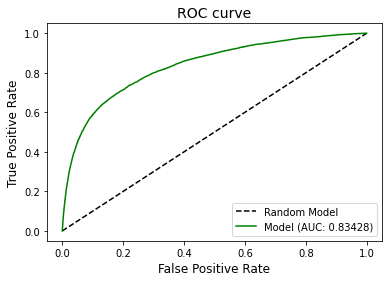

In [ ]:
# ROC sobre training
optbin.scorecard.plot_auc_roc(y_train, y_prob_train)

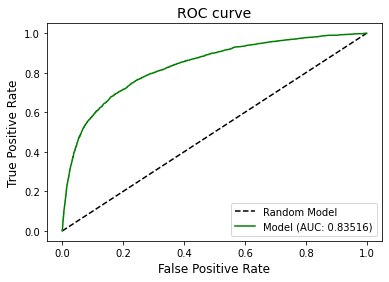

In [ ]:
# ROC sobre testing
optbin.scorecard.plot_auc_roc(y_test, y_prob_test)

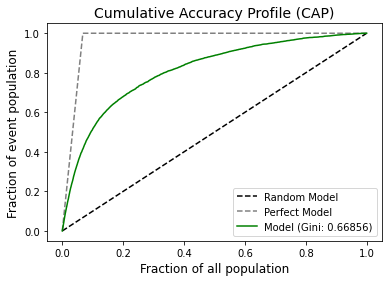

In [ ]:
# CAP sobre train
optbin.scorecard.plot_cap(y_train, y_prob_train)

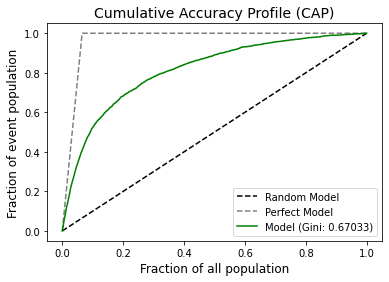

In [ ]:
# CAP sobre test
optbin.scorecard.plot_cap(y_test, y_prob_test)

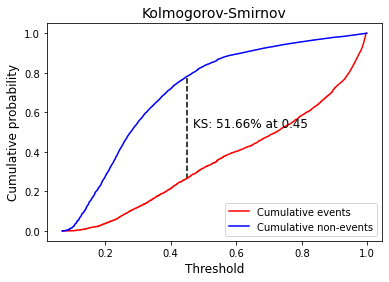

In [ ]:
# KS sobre train
optbin.scorecard.plot_ks(y_train, y_prob_train)

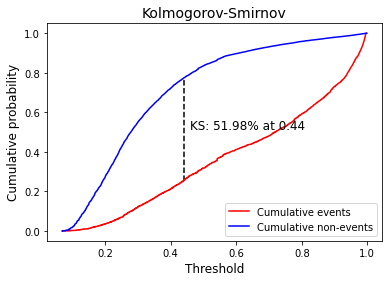

In [ ]:
# KS sobre test
optbin.scorecard.plot_ks(y_test, y_prob_test)

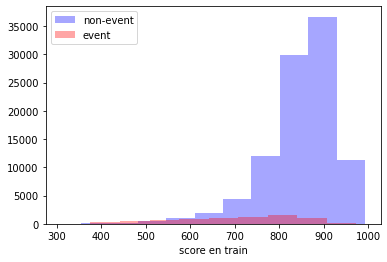

In [ ]:
# Distribución de scores para buenos y malos en train
score_train = scorecard.score(X_train)
mask = y_train == 0
plt.hist(score_train[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score_train[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.legend()
plt.show()

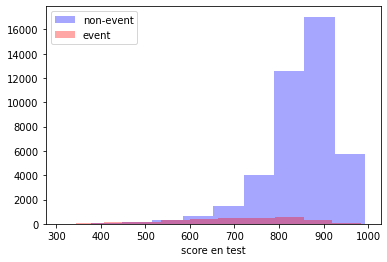

In [ ]:
# Distribución de scores para buenos y malos en test
score_test = scorecard.score(X_test)
mask = y_test == 0
plt.hist(score_test[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score_test[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.legend()
plt.show()

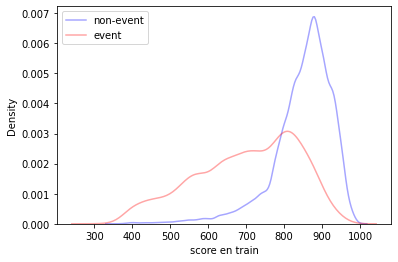

In [ ]:
# Distribución de scores para buenos y malos en train
import seaborn as sns
score_train = scorecard.score(X_train)
mask = y_train == 0
sns.kdeplot(score_train[mask], label="non-event", color="b", alpha=0.35)
sns.kdeplot(score_train[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.legend()
plt.show()

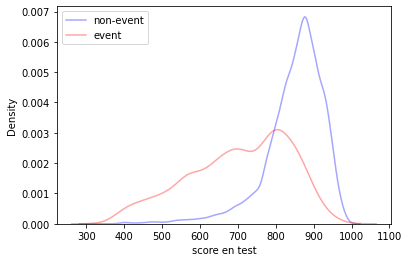

In [ ]:
# Distribución de scores para buenos y malos en test
score_test = scorecard.score(X_test)
mask = y_test == 0
sns.kdeplot(score_test[mask], label="non-event", color="b", alpha=0.35)
sns.kdeplot(score_test[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.legend()
plt.show()

Podemos ver que el score para no defaulters está concentrado alrededor de los 900 puntos, mientras que para los defaulters baja hasta los 300 puntos.

En algunas ocasiones es útil revisar también las predicciones binarias (default o no default) en lugar de la probabilidad o el score. Esto lo podemos hacer (y optimizar) como se observa a continuación.

In [ ]:
# Matriz de confusión sobre train
print(skmet.classification_report(y_train, np.where(y_prob_train>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     97908
           1       0.23      0.68      0.34      7091

    accuracy                           0.82    104999
   macro avg       0.60      0.76      0.62    104999
weighted avg       0.92      0.82      0.86    104999



In [ ]:
# Matriz de confusión sobre test
print(skmet.classification_report(y_test, np.where(y_prob_test>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     42065
           1       0.22      0.68      0.34      2935

    accuracy                           0.82     45000
   macro avg       0.60      0.76      0.62     45000
weighted avg       0.93      0.82      0.86     45000



(0.0, 1.0)

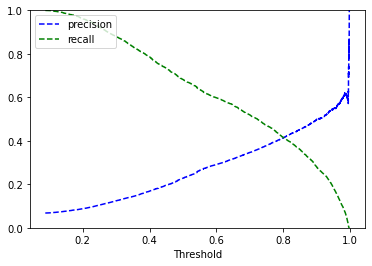

In [ ]:
# Curva precission-recall para optimizar el punto de corte
prec, rec, thre = skmet.precision_recall_curve(y_train, y_prob_train)
plt.plot(thre, prec[:-1], 'b--', label='precision')
plt.plot(thre, rec[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])

In [ ]:
# Matriz de confusión sobre train (con nuevo corte)
print(skmet.classification_report(y_train, np.where(y_prob_train>0.6, 1, 0)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     97908
           1       0.29      0.60      0.39      7091

    accuracy                           0.87    104999
   macro avg       0.63      0.75      0.66    104999
weighted avg       0.92      0.87      0.89    104999



In [ ]:
# Matriz de confusión sobre test (con nuevo corte)
print(skmet.classification_report(y_test, np.where(y_prob_test>0.6, 1, 0)))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     42065
           1       0.29      0.59      0.38      2935

    accuracy                           0.88     45000
   macro avg       0.63      0.74      0.66     45000
weighted avg       0.92      0.88      0.90     45000



Bajo estas visualizaciones podemos concluir que el modelo es bueno y está listo para ser probado en **producción**.

# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

* Una vez desarrollado el scorecard este puede guardarse en una tabla como se muestra a continuación.

* Estos resultados nos son útiles para evaluar a los clientes que se acerquen a la institución a solicitar un crédito (o para evaluar el comportamiento de los que se encuentran pagando uno).

* Al final deberemos guardar también el modelo predicho (de preferencia como un objeto pickle).

# Confirmación de puntajes mínimo y máximo
scorecard.table(style="summary").groupby("Variable").agg({'Points' : [np.min, np.max]}).sum()

In [ ]:
# Scorecard resumido
scorecard.table(style="summary").to_excel('drive/MyDrive/CreditRiskPython/Resultados/ScorecardSummary.xlsx')

In [ ]:
# Scorecard detallado
scorecard.table(style="detailed").to_excel('drive/MyDrive/CreditRiskPython/Resultados/ScorecardDetailed.xlsx')

**Conclusiones**

* Al ser un proceso automatizado, pueden dejarse de lado circunstancias particulares. Hay personas que podrían ser sujetas de crédito por su nivel de ingresos, pero, por ejemplo, no cuentan con un amplio historial en el sistema financiero.

* La evaluación crediticia se reduce a un número, dejando de lado aspectos cualitativos como la disposición de la persona a cumplir con sus obligaciones financieras.

* El modelo generado se basa en el pasado, pero no puede prever todo lo que sucederá en el futuro, como la pérdida de un empleo.

# **Referencias** <a class="anchor" id="18"></a>

1. OptBinning. (2022). Guillermo Navas-Palencia. 
2. http://gnpalencia.org/optbinning/index.html
3. DataPrep. (2022). SFU Database System Lab MIT. https://dataprep.ai/
4. Scikit-Learn. (2011). Pedregosa et al. https://scikit-learn.org/stable/